In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [195]:
housing = pd.read_csv('/Users/jessicajoy/Desktop/housing_eda.csv')

In [ ]:
#plt.savefig('spx_count.png')

### Top Neighborhood Counts

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

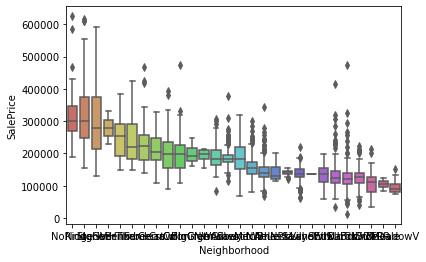

In [327]:
my_order = housing.groupby(by=["Neighborhood"])['SalePrice'].mean().sort_values(ascending=False).index
sns.boxplot(y=housing['SalePrice'], x=housing['Neighborhood'], order=my_order, palette="hls")

In [ ]:
#add size of house
#GrLivArea

In [365]:
top= housing.groupby('Neighborhood').SalePrice.agg(['mean','count'])
top= top.sort_values(by='count', ascending=False).head(8)
top

,mean,count
Neighborhood,,
NAmes,145087.258537,410
CollgCr,198133.169492,236
OldTown,126939.018779,213
Edwards,132837.628049,164
Somerst,228761.853147,143
Gilbert,189439.867133,143
Sawyer,137492.863309,139
NWAmes,190372.398374,123


Text(0, 0.5, 'Count')

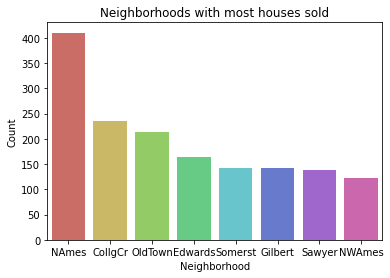

In [366]:
sns.barplot(x=top.index, y='count', data=top, palette="hls")
plt.title("Neighborhoods with most houses sold")
plt.xlabel('Neighborhood')
plt.ylabel('Count')

Text(0, 0.5, 'Avg Sale Price')

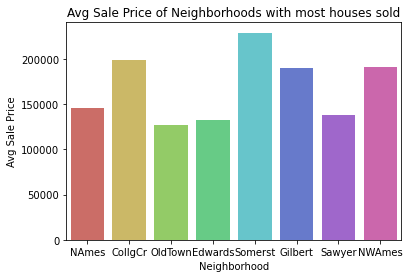

In [367]:
sns.barplot(x=top.index, y='mean', data=top, palette="hls")
plt.title("Avg Sale Price of Neighborhoods with most houses sold")
plt.xlabel('Neighborhood')
plt.ylabel('Avg Sale Price')

### Heating Quality

In [362]:
df = housing[["Neighborhood", "HeatingQC", "SalePrice"]]

In [363]:
df = pd.pivot_table(data=housing,
                    index='Neighborhood',
                    values='SalePrice',
                    columns='HeatingQC')
df = df.loc[('NAmes', 'CollgCr','OldTown','Edwards','Sawyer','Gilbert','NWAmes','Somerst'), :]

Text(0.5, 15.0, 'Heating Quality')

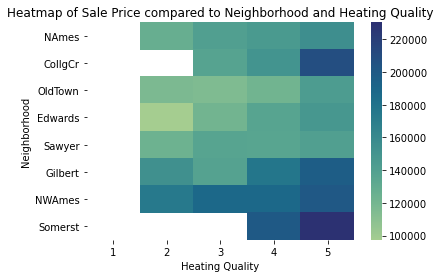

In [364]:
sns.heatmap(df, cmap="crest")
plt.title("Heatmap of Sale Price compared to Neighborhood and Heating Quality")
plt.ylabel('Neighborhood')
plt.xlabel('Heating Quality')

## Basement Analysis:
### BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinSF1, Total BsmtSF

####  Basement quality across Neighborhoods

In [333]:
df1 = housing[["Neighborhood", "BsmtQual", "SalePrice"]]
df1 = pd.pivot_table(data=housing,
                    index='Neighborhood',
                    values='SalePrice',
                    columns='BsmtQual')
df1 = df1.loc[('NAmes', 'CollgCr','OldTown','Edwards','Sawyer','Gilbert','NWAmes','Somerst'), :]

Text(0.5, 15.0, 'Basement Quality')

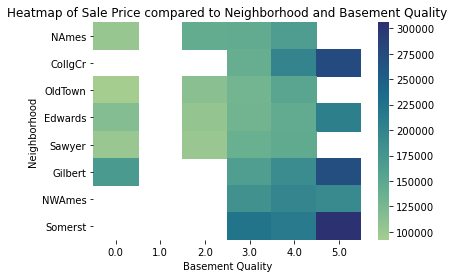

In [334]:
sns.heatmap(df1, cmap="crest")
plt.title("Heatmap of Sale Price compared to Neighborhood and Basement Quality")
plt.ylabel('Neighborhood')
plt.xlabel('Basement Quality')

#### Basement Finish Type

Text(0.5, 6.79999999999999, 'Basement Finish Type')

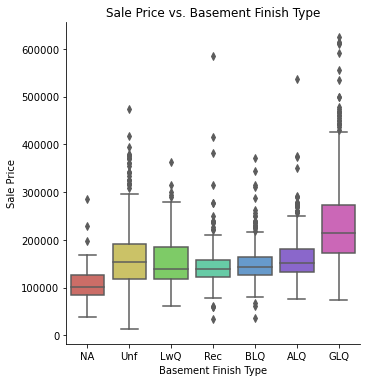

In [277]:
bfin= sns.catplot(x="BsmtFinType1", y="SalePrice", kind="box", data=housing, palette="hls")
bfin.set_xticklabels(['NA','Unf','LwQ', 'Rec','BLQ','ALQ','GLQ'])
plt.title("Sale Price vs. Basement Finish Type")
plt.ylabel('Sale Price')
plt.xlabel('Basement Finish Type')

#### Basement Exposure

Text(0.5, 6.79999999999999, 'Basement Exposure')

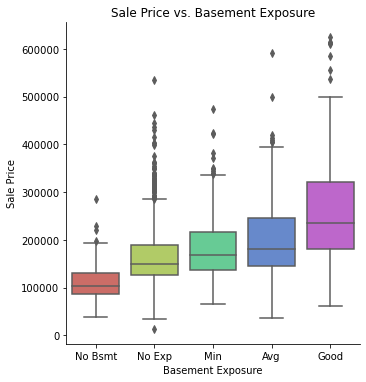

In [280]:
bexp= sns.catplot(x="BsmtExposure", y="SalePrice", kind="box", data=housing, palette="hls")
bexp.set_xticklabels(['No Bsmt','No Exp','Min', 'Avg','Good'])
plt.title("Sale Price vs. Basement Exposure")
plt.ylabel('Sale Price')
plt.xlabel('Basement Exposure')

#### Total Basement SF

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


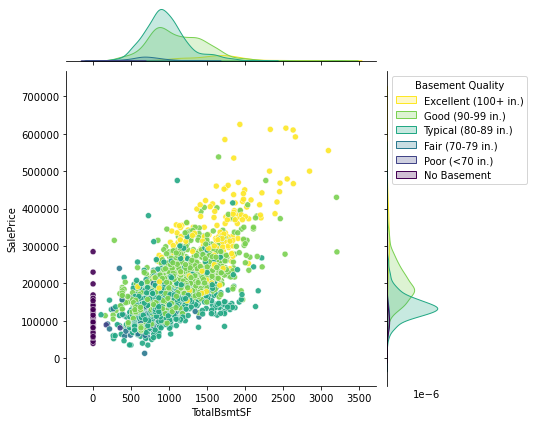

In [371]:
tbsf= sns.jointplot(x=housing["TotalBsmtSF"], y="SalePrice", hue='BsmtQual', 
                    alpha= 0.9, 
                    data=housing, 
                    palette="viridis", 
                    hue_order = ['0.0', '1.0','2.0','3.0','4.0','5.0'], legend=False)
plt.legend(title='Basement Quality', loc='upper left', labels=['Excellent (100+ in.)','Good (90-99 in.)','Typical (80-89 in.)','Fair (70-79 in.)','Poor (<70 in.)','No Basement' ])


### Type of Driveway

Text(-15.450000000000003, 0.5, 'Sale Price')

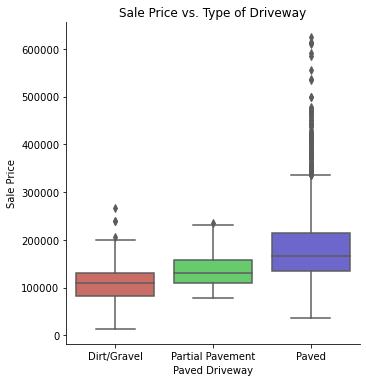

In [268]:
pave = sns.catplot(x="PavedDrive", y="SalePrice", kind="box", data=housing, palette="hls")
pave.set_xticklabels(['Dirt/Gravel','Partial Pavement', 'Paved'])
plt.title("Sale Price vs. Type of Driveway")
plt.xlabel('Paved Driveway')
plt.ylabel('Sale Price')

### Year Built

In [205]:
housing['YearBuilt'].describe()

count    2578.000000
mean     1970.290535
std        29.718779
min      1872.000000
25%      1953.000000
50%      1972.000000
75%      1999.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [206]:
years = [] 
for year in housing['YearBuilt']: 
    if year <= 1900: 
        years.append(1) 
    elif year > 1900 and year <= 1950: 
        years.append(2) 
    elif year >= 1951 and year <= 2000: 
        years.append(3)
    else: 
        years.append(4) 

housing['YearRange'] = years

In [207]:
housing['YearRange'].value_counts()

3    1420
4     559
2     549
1      50
Name: YearRange, dtype: int64

Text(-15.450000000000003, 0.5, 'Sale Price')

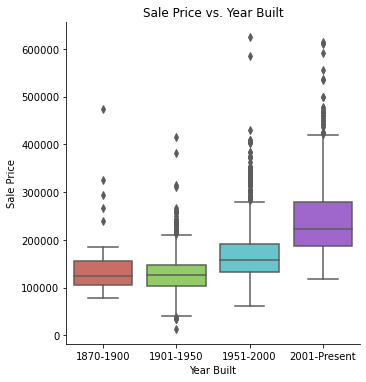

In [267]:
year = sns.catplot(x="YearRange", y="SalePrice", kind="box", data=housing, palette="hls")
year.set_xticklabels(['1870-1900','1901-1950', '1951-2000', '2001-Present'])
plt.title("Sale Price vs. Year Built")
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

Text(0, 0.5, 'Sale Price')

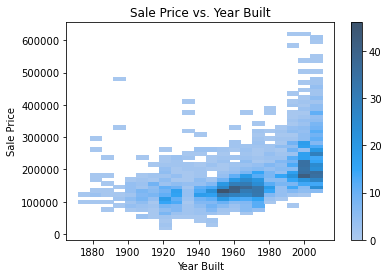

In [346]:
year = sns.histplot(x="YearBuilt", y="SalePrice", cbar=True, data=housing, palette="hls")
plt.title("Sale Price vs. Year Built")
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

### Year and Month Sold

Text(0, 0.5, 'Count')

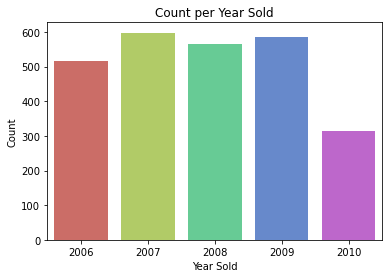

In [266]:
sns.countplot(x="YrSold", data=housing, palette="hls")
plt.title("Count per Year Sold")
plt.xlabel('Year Sold')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

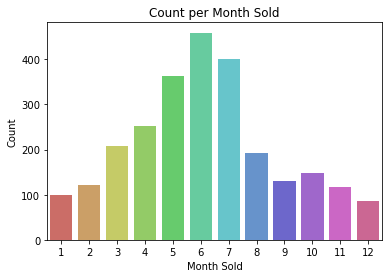

In [265]:
sns.countplot(x="MoSold", data=housing, palette="hls")
plt.title("Count per Month Sold")
plt.xlabel('Month Sold')
plt.ylabel('Count')

### Garage Area

In [ ]:
garage= sns.jointplot(x="GarageArea", y="SalePrice", alpha= 0.9, data=housing, palette="viridis")
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')